In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import seaborn as sns

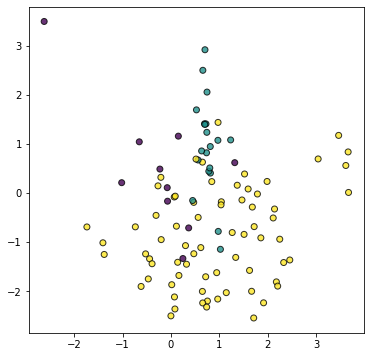

In [6]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.2, 0.7],
    class_sep=0.8,
    random_state=0,
)

_, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k")

In [7]:
def plot_resampling(X, y, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    sns.despine(ax=ax, offset=10)
    ax.set_title(f"Decision function for {sampler.__class__.__name__}")
    return sampler.__class__.__name__, Counter(y_res)

SMOTE: Counter({1: 70, 2: 70, 0: 70})
SMOTEENN: Counter({1: 60, 0: 50, 2: 45})
SMOTETomek: Counter({0: 68, 1: 66, 2: 64})


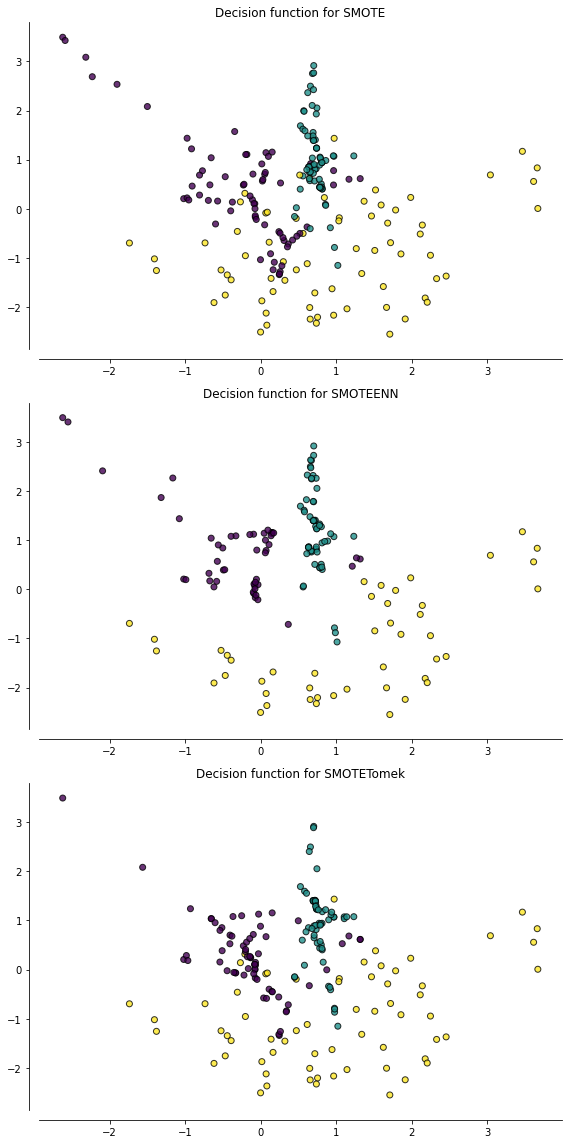

In [8]:
# SMOTE allows to generate samples.
# However, this method of over-sampling does not have any knowledge regarding the underlying distribution.
# Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated.
# Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples.
# Two methods are usually used in the literature: (i) Tomek’s link and (ii) edited nearest neighbours cleaning methods.
# Imbalanced-learn provides two ready-to-use samplers SMOTETomek and SMOTEENN.
# In general, SMOTEENN cleans more noisy data than SMOTETomek.

smote = SMOTE(k_neighbors=5)

samplers = [SMOTE(random_state=0, n_jobs=-1),
            # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.
            SMOTEENN(random_state=0, n_jobs=-1,
                     # The SMOTE object to use. If not given, a SMOTE object with default parameters will be given.
                     smote=smote),
            # Combine over- and under-sampling using SMOTE and Tomek links.
            SMOTETomek(random_state=0, n_jobs=-1,
                       # The SMOTE object to use. If not given, a SMOTE object with default parameters will be given.
                       smote=smote)]

fig, axs = plt.subplots(3, 1, figsize=(8, 16))

for ax, sampler in zip(axs, samplers):
    name, count = plot_resampling(X, y, sampler, ax)
    print(name + ":", count)
fig.tight_layout()

plt.show()
